In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
#Imports Métricas
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
#Carregando o conjunto de dados
loan = pd.read_csv('loan_prediction.csv')

In [3]:
#Amostra de dados
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Descrição das Variáveis do Dataset
descr = pd.read_excel('descricao_variaveis_ml.xlsx')

In [5]:
#Imprimindo na Tela 
descr

,Nome da Variavel,Descrição
0,Loan_ID,ID do emprestimo
1,Gender,Gênero
2,Married,Estado Civil
3,Dependents,Número de dependentes
4,Education,Nível de Escolaridade
5,Self_Employed,Tipo de Emprego
6,ApplicantIncome,Renda Mensal
7,CoapplicantIncome,Renda Mensal do Conjuge
8,LoanAmount,Quantia Solicitada para Emprestimo
9,Loan_Amount_Term,Tempo de Financiamento


## Análise Exploratória dos dados

In [6]:
#Verificando os tipos de dados
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Variáveis Categóricas
loan.dtypes[loan.dtypes == 'object']

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [8]:
#Variáveis não Categóricas
loan.dtypes[loan.dtypes != 'object']

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

### Exploração das Variáveis Numéricas

In [9]:
#Função para ajustar a variável Loan Status(target)
def ajustar(x):
    if x == 'Y':
        return 1
    return 0

In [10]:
loan.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
#Aplica a função 
loan['Loan_Status'] = loan['Loan_Status'].map(ajustar)

In [12]:
loan['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [13]:
#Alteração da variável resposta (target)
loan.rename({'Loan_Status' : 'Target'}, axis = 'columns', inplace = True)

In [14]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Target
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


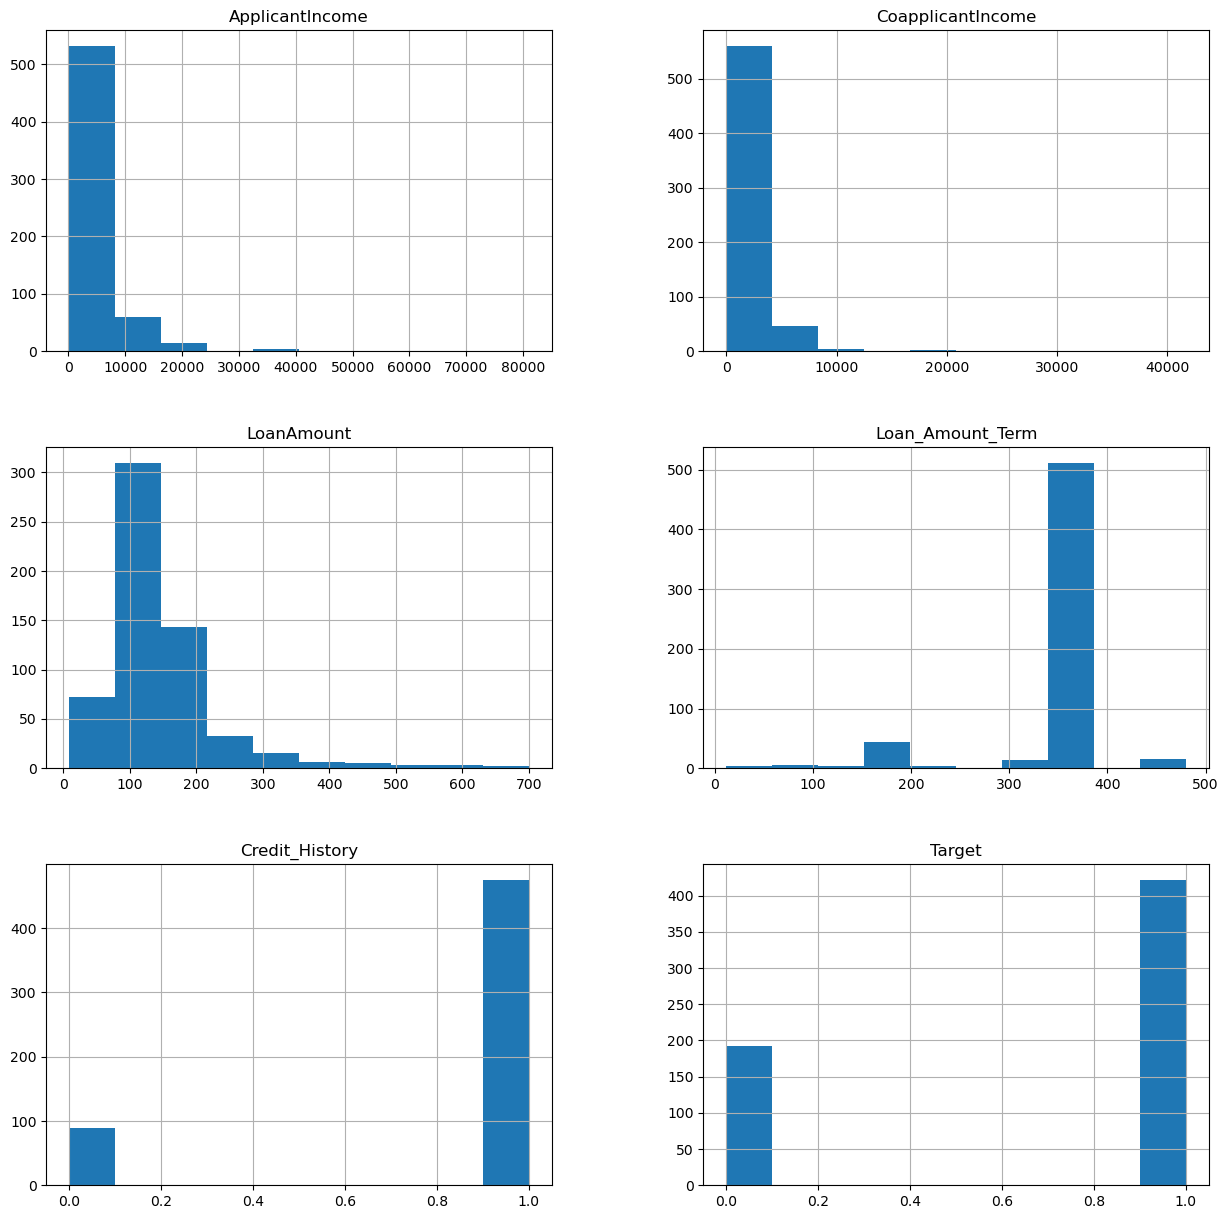

In [15]:
#Plot
loan.hist(figsize = (15,15), bins = 10)
plt.show()

#### Parece que há outlier nas variáveis ApplicantIncome e CoapplicantIncome, pois o valor máximo esta muito distante da média

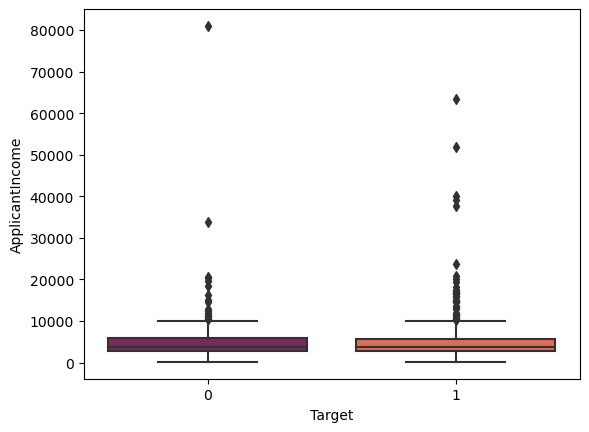

In [16]:
sns.boxplot(x="Target", y="ApplicantIncome", data= loan, palette="rocket");

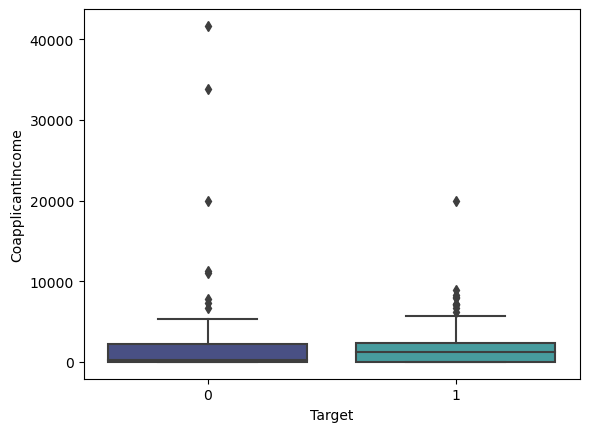

In [17]:
sns.boxplot(x="Target", y="CoapplicantIncome", data= loan, palette="mako");

In [18]:
#Eliminando outliers das variáveis Applicantincome e Coapplicantincome
out1 = loan['ApplicantIncome'].quantile(0.90)
print(out1)

9459.900000000007


In [19]:
out2 = loan['CoapplicantIncome'].quantile(0.90)
print(out2)

3782.200000000002


In [20]:
loan = loan[(loan['ApplicantIncome'] <= out1) & (loan['CoapplicantIncome'] <= out2)]

In [21]:
loan.count()

Loan_ID              495
Gender               488
Married              493
Dependents           483
Education            495
Self_Employed        466
ApplicantIncome      495
CoapplicantIncome    495
LoanAmount           477
Loan_Amount_Term     483
Credit_History       456
Property_Area        495
Target               495
dtype: int64

In [22]:
#Correlação entre variáveis
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Target
ApplicantIncome,1.000000,-0.346520,0.528307,-0.056871,0.033543,-0.000686
CoapplicantIncome,-0.346520,1.000000,0.217504,0.043785,0.002970,0.082591
LoanAmount,0.528307,0.217504,1.000000,0.109726,0.019271,-0.037840
Loan_Amount_Term,-0.056871,0.043785,0.109726,1.000000,-0.017506,-0.040500
Credit_History,0.033543,0.002970,0.019271,-0.017506,1.000000,0.581450
Target,-0.000686,0.082591,-0.037840,-0.040500,0.581450,1.000000


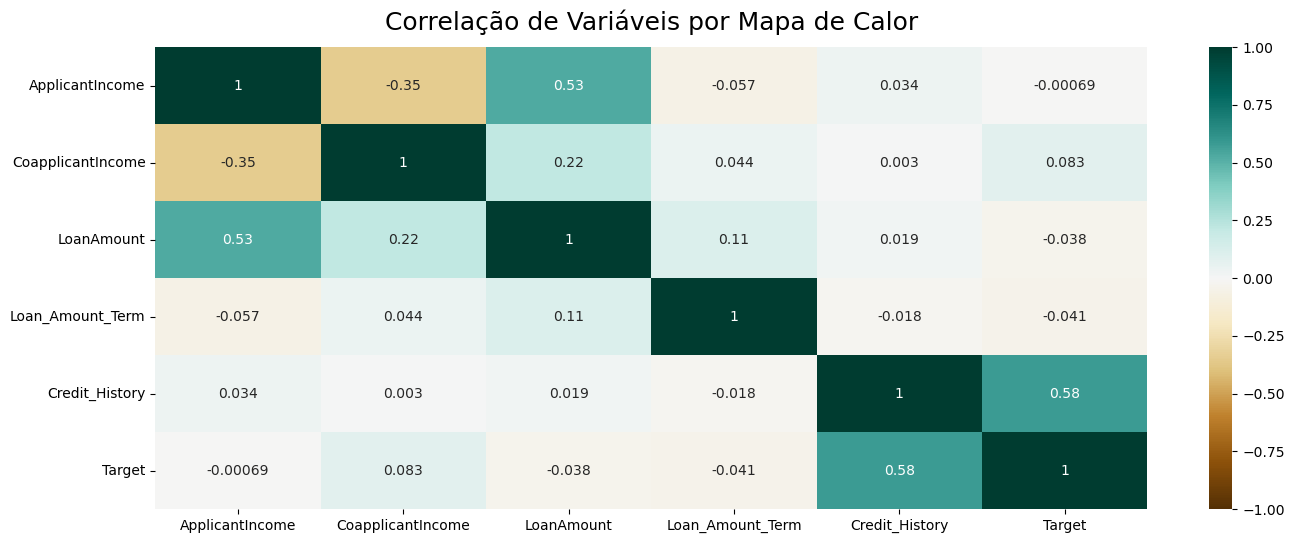

In [23]:
#Visualização de correlação por mapa de calor
plt.figure(figsize = (16,6))
sns.heatmap(loan.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title('Correlação de Variáveis por Mapa de Calor', fontdict={'fontsize':18}, pad=12);

### Exploração da Variável Categórica

In [24]:
loan.describe(include = ['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,495,488,493,483,495,466,495
unique,495,2,2,4,2,2,3
top,LP001002,Male,Yes,0,Graduate,No,Semiurban
freq,1,391,315,282,369,414,189


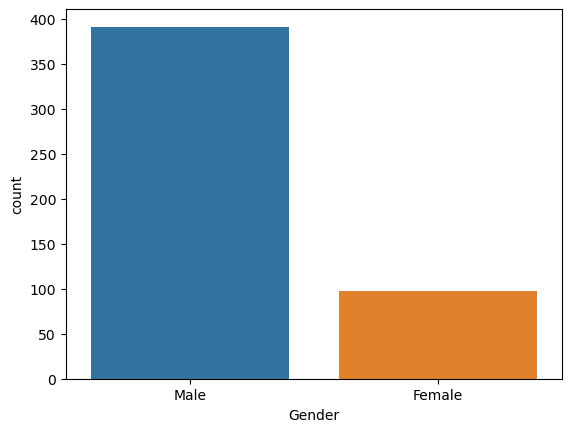

In [25]:
#Plot
sns.countplot(data = loan, x = 'Gender', label = 'Count');

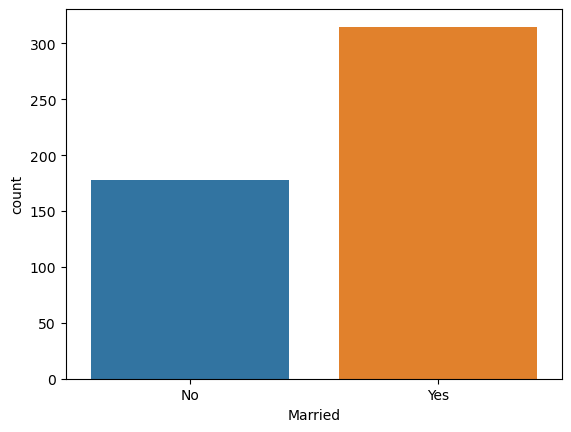

In [26]:
sns.countplot(data = loan, x = 'Married', label = 'Count');

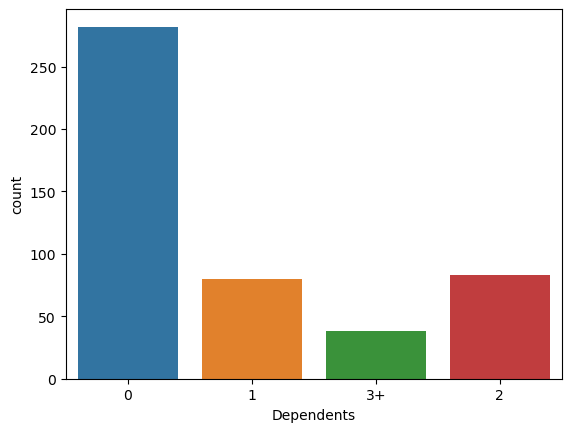

In [27]:
sns.countplot(data = loan, x = 'Dependents', label = 'Count');

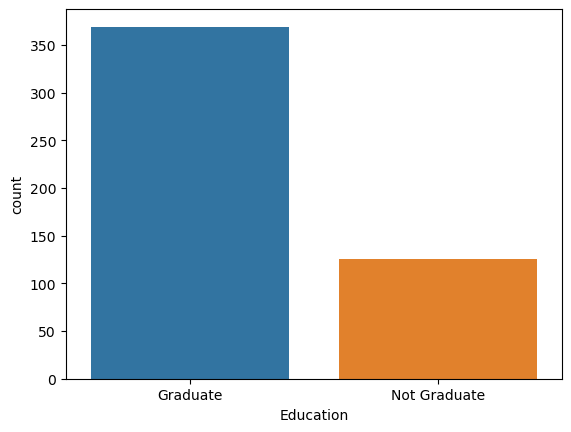

In [28]:
sns.countplot(data = loan, x = 'Education', label = 'Count');

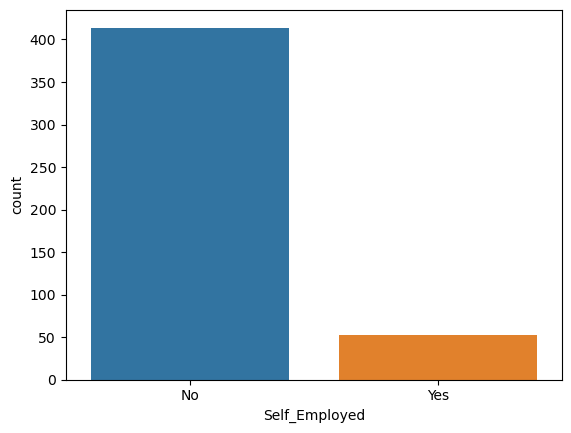

In [29]:
sns.countplot(data = loan, x = 'Self_Employed', label = 'Count');

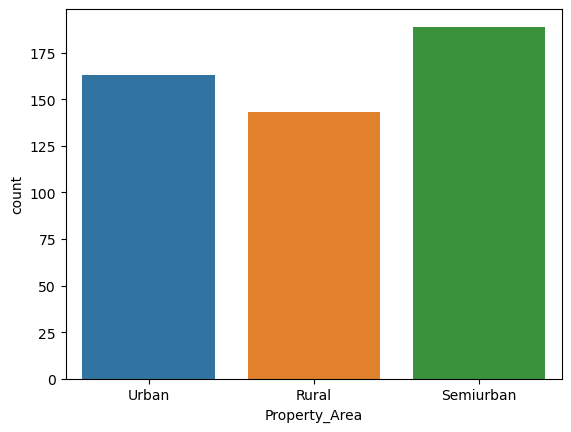

In [30]:
sns.countplot(data = loan, x = 'Property_Area', label = 'Count');

### Tratamento das Variáveis Nulas

In [31]:
loan.isnull().sum()

Loan_ID               0
Gender                7
Married               2
Dependents           12
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     12
Credit_History       39
Property_Area         0
Target                0
dtype: int64

In [32]:
loan[loan['Gender'].isnull() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,0
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,0
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,0
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,0
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,0
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,1
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,1


In [33]:
#Extração da moda para a variável Gender
moda_Gender = loan['Gender'].value_counts().index[0]

In [34]:
#Extração da moda para a variável Married
moda_Married = loan['Married'].value_counts().index[0]

In [35]:
#Extração da moda para a variável Dependents
moda_Dependets = loan['Dependents'].value_counts().index[0]

In [36]:
#Extração da moda para a variável Self_Employed
moda_Self_Employed = loan['Self_Employed'].value_counts().index[0]

In [37]:
#Extração da moda para a variável Credit History
moda_Credit_History = loan['Credit_History'].value_counts().index[0]

In [38]:
#Preenchimento dos valores ausentes de variáveis categóricas 
loan['Gender'].fillna(value = moda_Gender, inplace = True)
loan['Married'].fillna(value = moda_Married, inplace = True)
loan['Dependents'].fillna(value = moda_Dependets, inplace = True)
loan['Self_Employed'].fillna(value = moda_Self_Employed, inplace = True)
loan['Credit_History'].fillna(value = moda_Credit_History, inplace = True)

In [39]:
#Preenchimento dos valores ausentes de variáveis numéricas
loan['LoanAmount'].fillna(value = loan['LoanAmount'].median(), inplace = True)
loan['Loan_Amount_Term'].fillna(value = loan['Loan_Amount_Term'].mean(), inplace = True)

In [40]:
#Conferência de Valores Nulos
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Target               0
dtype: int64

In [41]:
#Conferência de valores duplicados
loan.duplicated().sum()

0

In [42]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Target'],
      dtype='object')

### Engenharia de Atributos - Novas variáveis

In [43]:
loan['razao_renda_total'] = loan['LoanAmount']  / ( loan['ApplicantIncome'] + loan['CoapplicantIncome'] ) *100

<AxesSubplot:>

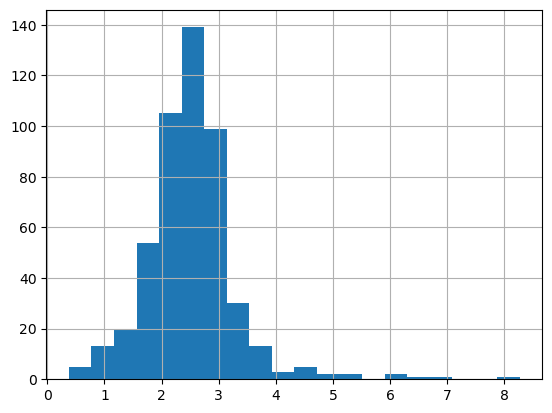

In [44]:
loan['razao_renda_total'].hist(bins = 20)

### Label Encoding e One Hot Encoding

In [45]:
#Função para label encoding da váriavel Gender

def enc_gender(x):
    if x == 'Male':
        return 0
    return 1

In [46]:
#Aplica a função
loan['Gender'] = loan['Gender'].map(enc_gender)

In [47]:
#Função para label encoding da variável Married
def enc_married(x):
    if x == 'No':
        return 0
    return 1 

In [48]:
loan['Married'] = loan['Married'].map(enc_married)

In [49]:
#Função para label encoding da variável Education
def enc_education(x):
    if x == 'Not Graduate':
        return 0
    return 1

In [50]:
loan['Education'] = loan['Education'].map(enc_education)

In [51]:
#Função para label encoding da variável Self Employed
def enc_employed(x):
    if x == 'No':
        return 0
    return 1 

In [52]:
loan['Self_Employed'] = loan['Self_Employed'].map(enc_employed)

In [53]:
#One Hot Encoding para variável Property_Area 
onehot = pd.get_dummies(loan['Property_Area']) 

In [54]:
loan = loan.join(onehot)

In [55]:
loan.drop('Property_Area', axis = 1, inplace = True)

In [56]:
#Tratamento da variável 'Dependents'
loan.loc[:,'Dependents'] = loan.Dependents.replace('3+',3)

In [57]:
loan.Dependents.value_counts()

0    294
2     83
1     80
3     38
Name: Dependents, dtype: int64

In [58]:
loan['Dependents'] = loan['Dependents'].astype(int)

In [59]:
#Remoção da coluna ID
loan = loan.drop(columns = 'Loan_ID')

In [60]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Target,razao_renda_total,Rural,Semiurban,Urban
0,0,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,2.051633,0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,2.101461,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,2.200000,0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,2.428658,0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,2.350000,0,0,1


### Divisão do Conjunto de Dados em Treino e Teste

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = loan.drop('Target', axis = 1)
y = loan.Target

In [63]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size = 0.3, random_state = 61658)

In [64]:
X_tr.size, X_ts.size

(4844, 2086)

In [65]:
#Variável para armazenar o resultado dos modelos
modelos = pd.DataFrame()

### Normalização e Padronização dos Dados

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [67]:
#Separação das variáveis para aplicar a normaliação e padronização dos dados
min_max_num = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
stand_num = ['razao_renda_total']

In [68]:
min_max_scaler = MinMaxScaler()
stand_scaler = StandardScaler()

In [69]:
#Treinamento do MinMaxScaler e StandardScaler no conjunto de treino.
min_max_scaler.fit(X_tr[min_max_num])

MinMaxScaler()

In [70]:
stand_scaler.fit(X_tr[stand_num])

StandardScaler()

In [71]:
#Aplicar a normalização e a padronização nos conjuntos de treino e teste
X_tr[min_max_num] = min_max_scaler.transform(X_tr[min_max_num])
X_ts[min_max_num] = min_max_scaler.transform(X_ts[min_max_num])



In [72]:
X_tr[stand_num] = stand_scaler.transform(X_tr[stand_num])
X_ts[stand_num] = stand_scaler.transform(X_ts[stand_num])

### Construção do Modelo de Machine Learning (Benchmark)

In [73]:
from sklearn.ensemble import RandomForestClassifier


In [74]:
params_1 = {'n_estimators' : [100,300,500], 
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [3,5,7,9,11],
            'min_samples_split' :[2,3,5]
           }


In [75]:
model_1 = GridSearchCV(RandomForestClassifier(random_state = 61658, n_jobs = 2),
                      params_1,
                      cv = 5,
                      scoring = 'roc_auc',
                      verbose = 10)

In [76]:
model_1.fit(X_tr, y_tr)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100
[CV 1/5; 1/90] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.771 total time=   1.5s
[CV 2/5; 1/90] START criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100
[CV 2/5; 1/90] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.784 total time=   0.0s
[CV 3/5; 1/90] START criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100
[CV 3/5; 1/90] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.0s
[CV 4/5; 1/90] START criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100
[CV 4/5; 1/90] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.0s
[CV 5/5; 1/90] START criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100
[CV 5/5; 1/90] END cri

[CV 5/5; 8/90] END criterion=gini, max_depth=3, min_samples_split=5, n_estimators=300;, score=0.773 total time=   0.2s
[CV 1/5; 9/90] START criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500
[CV 1/5; 9/90] END criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500;, score=0.773 total time=   0.3s
[CV 2/5; 9/90] START criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500
[CV 2/5; 9/90] END criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500;, score=0.775 total time=   0.3s
[CV 3/5; 9/90] START criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500
[CV 3/5; 9/90] END criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500;, score=0.826 total time=   0.3s
[CV 4/5; 9/90] START criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500
[CV 4/5; 9/90] END criterion=gini, max_depth=3, min_samples_split=5, n_estimators=500;, score=0.830 total time=   0.3s
[CV 5/5; 9/90] START criterion=gini, max_depth=3, min

[CV 5/5; 16/90] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=100;, score=0.744 total time=   0.0s
[CV 1/5; 17/90] START criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300
[CV 1/5; 17/90] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300;, score=0.811 total time=   0.1s
[CV 2/5; 17/90] START criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300
[CV 2/5; 17/90] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300;, score=0.794 total time=   0.2s
[CV 3/5; 17/90] START criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300
[CV 3/5; 17/90] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300;, score=0.817 total time=   0.1s
[CV 4/5; 17/90] START criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300
[CV 4/5; 17/90] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=300;, score=0.841 total time=   0.2s
[CV 5/5; 17/90] START criterion=gini, max_de

[CV 5/5; 24/90] END criterion=gini, max_depth=7, min_samples_split=3, n_estimators=500;, score=0.736 total time=   0.3s
[CV 1/5; 25/90] START criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100
[CV 1/5; 25/90] END criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.759 total time=   0.0s
[CV 2/5; 25/90] START criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100
[CV 2/5; 25/90] END criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.0s
[CV 3/5; 25/90] START criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100
[CV 3/5; 25/90] END criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.795 total time=   0.0s
[CV 4/5; 25/90] START criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100
[CV 4/5; 25/90] END criterion=gini, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 5/5; 25/90] START criterion=gini, max_de

[CV 5/5; 32/90] END criterion=gini, max_depth=9, min_samples_split=3, n_estimators=300;, score=0.745 total time=   0.2s
[CV 1/5; 33/90] START criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500
[CV 1/5; 33/90] END criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500;, score=0.778 total time=   0.3s
[CV 2/5; 33/90] START criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500
[CV 2/5; 33/90] END criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500;, score=0.806 total time=   0.3s
[CV 3/5; 33/90] START criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500
[CV 3/5; 33/90] END criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500;, score=0.812 total time=   0.3s
[CV 4/5; 33/90] START criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500
[CV 4/5; 33/90] END criterion=gini, max_depth=9, min_samples_split=3, n_estimators=500;, score=0.851 total time=   0.3s
[CV 5/5; 33/90] START criterion=gini, max_de

[CV 5/5; 40/90] END criterion=gini, max_depth=11, min_samples_split=3, n_estimators=100;, score=0.740 total time=   0.0s
[CV 1/5; 41/90] START criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300
[CV 1/5; 41/90] END criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300;, score=0.786 total time=   0.2s
[CV 2/5; 41/90] START criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300
[CV 2/5; 41/90] END criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300;, score=0.818 total time=   0.2s
[CV 3/5; 41/90] START criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300
[CV 3/5; 41/90] END criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300;, score=0.818 total time=   0.2s
[CV 4/5; 41/90] START criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300
[CV 4/5; 41/90] END criterion=gini, max_depth=11, min_samples_split=3, n_estimators=300;, score=0.867 total time=   0.2s
[CV 5/5; 41/90] START criterion=gin

[CV 4/5; 48/90] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=500;, score=0.822 total time=   0.3s
[CV 5/5; 48/90] START criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=500
[CV 5/5; 48/90] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=500;, score=0.780 total time=   0.3s
[CV 1/5; 49/90] START criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100
[CV 1/5; 49/90] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100;, score=0.793 total time=   0.0s
[CV 2/5; 49/90] START criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100
[CV 2/5; 49/90] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100;, score=0.767 total time=   0.0s
[CV 3/5; 49/90] START criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100
[CV 3/5; 49/90] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100;, score=0.794 total time=   0.0s
[CV 4/5; 49/90] S

[CV 3/5; 56/90] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=300;, score=0.804 total time=   0.2s
[CV 4/5; 56/90] START criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=300
[CV 4/5; 56/90] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=300;, score=0.836 total time=   0.2s
[CV 5/5; 56/90] START criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=300
[CV 5/5; 56/90] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=300;, score=0.760 total time=   0.2s
[CV 1/5; 57/90] START criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=500
[CV 1/5; 57/90] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=500;, score=0.774 total time=   0.3s
[CV 2/5; 57/90] START criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=500
[CV 2/5; 57/90] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=500;, score=0.793 total time=   0.3s
[CV 3/5; 57/90] S

[CV 2/5; 64/90] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100;, score=0.806 total time=   0.0s
[CV 3/5; 64/90] START criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100
[CV 3/5; 64/90] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100;, score=0.796 total time=   0.0s
[CV 4/5; 64/90] START criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100
[CV 4/5; 64/90] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100;, score=0.827 total time=   0.0s
[CV 5/5; 64/90] START criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100
[CV 5/5; 64/90] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100;, score=0.740 total time=   0.0s
[CV 1/5; 65/90] START criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=300
[CV 1/5; 65/90] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=300;, score=0.775 total time=   0.2s
[CV 2/5; 65/90] S

[CV 1/5; 72/90] END criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500;, score=0.797 total time=   0.3s
[CV 2/5; 72/90] START criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500
[CV 2/5; 72/90] END criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500;, score=0.810 total time=   0.3s
[CV 3/5; 72/90] START criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500
[CV 3/5; 72/90] END criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500;, score=0.821 total time=   0.3s
[CV 4/5; 72/90] START criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500
[CV 4/5; 72/90] END criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500;, score=0.848 total time=   0.3s
[CV 5/5; 72/90] START criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500
[CV 5/5; 72/90] END criterion=entropy, max_depth=7, min_samples_split=5, n_estimators=500;, score=0.739 total time=   0.3s
[CV 1/5; 73/90] S

[CV 1/5; 80/90] END criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300;, score=0.800 total time=   0.2s
[CV 2/5; 80/90] START criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300
[CV 2/5; 80/90] END criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300;, score=0.811 total time=   0.2s
[CV 3/5; 80/90] START criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300
[CV 3/5; 80/90] END criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300;, score=0.798 total time=   0.2s
[CV 4/5; 80/90] START criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300
[CV 4/5; 80/90] END criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300;, score=0.840 total time=   0.2s
[CV 5/5; 80/90] START criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300
[CV 5/5; 80/90] END criterion=entropy, max_depth=9, min_samples_split=5, n_estimators=300;, score=0.727 total time=   0.2s
[CV 1/5; 81/90] S

[CV 4/5; 87/90] END criterion=entropy, max_depth=11, min_samples_split=3, n_estimators=500;, score=0.871 total time=   0.3s
[CV 5/5; 87/90] START criterion=entropy, max_depth=11, min_samples_split=3, n_estimators=500
[CV 5/5; 87/90] END criterion=entropy, max_depth=11, min_samples_split=3, n_estimators=500;, score=0.732 total time=   0.3s
[CV 1/5; 88/90] START criterion=entropy, max_depth=11, min_samples_split=5, n_estimators=100
[CV 1/5; 88/90] END criterion=entropy, max_depth=11, min_samples_split=5, n_estimators=100;, score=0.777 total time=   0.0s
[CV 2/5; 88/90] START criterion=entropy, max_depth=11, min_samples_split=5, n_estimators=100
[CV 2/5; 88/90] END criterion=entropy, max_depth=11, min_samples_split=5, n_estimators=100;, score=0.814 total time=   0.0s
[CV 3/5; 88/90] START criterion=entropy, max_depth=11, min_samples_split=5, n_estimators=100
[CV 3/5; 88/90] END criterion=entropy, max_depth=11, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5;

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=2, random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc', verbose=10)

In [77]:
# Melhores parâmetros para o Modelo
model_1.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 100}

In [78]:
#Importancia de variáveis
imps = model_1.best_estimator_.feature_importances_
cols = X_tr.columns
order = np.argsort(imps)[::-1]

for col, imp in zip(cols[order], imps[order]):
    print(f'{col:30s}, {imp:.2f}')

Credit_History                , 0.30
razao_renda_total             , 0.17
ApplicantIncome               , 0.14
LoanAmount                    , 0.12
CoapplicantIncome             , 0.09
Dependents                    , 0.04
Loan_Amount_Term              , 0.04
Education                     , 0.02
Semiurban                     , 0.02
Married                       , 0.02
Rural                         , 0.01
Self_Employed                 , 0.01
Urban                         , 0.01
Gender                        , 0.01


In [79]:
#Métricas de Avaliação do Modelo

pred_v1 = model_1.predict_proba(X_ts)[:,1]

roc_auc_v1 = roc_auc_score(y_ts, pred_v1)
print(roc_auc_v1)

0.8088803088803089


In [80]:
#ROC nos dados e previsões em teste
fpr_1, tpr_1, thresholds = roc_curve(y_ts, pred_v1)

#AUC Score
auc_v1 = auc(fpr_1,tpr_1)
print(auc_v1)


0.8088803088803089


In [81]:
#Acuracia

y_pred_v1 = model_1.predict(X_ts)
acuracia_v1 = accuracy_score(y_ts, y_pred_v1)
print(acuracia_v1)

0.8657718120805369


In [82]:
#Recall do Modelo_1
recall_1 = recall_score(y_ts, y_pred_v1)

print(f"A sensibilidade do modelo é {round(recall_1,4)}")

A sensibilidade do modelo é 0.9732


In [83]:
#Dicionário com as métricas do modelo 1
dict_model_v1 = {
    'Nome' : 'Modelo_1',
    'Algoritmo' : 'Random Forest',
    'Roc_AUC_Score' : roc_auc_v1,
    'Auc Score' : auc_v1,
    'Acurácia' : acuracia_v1,
    'Recall' : recall_1
    
}

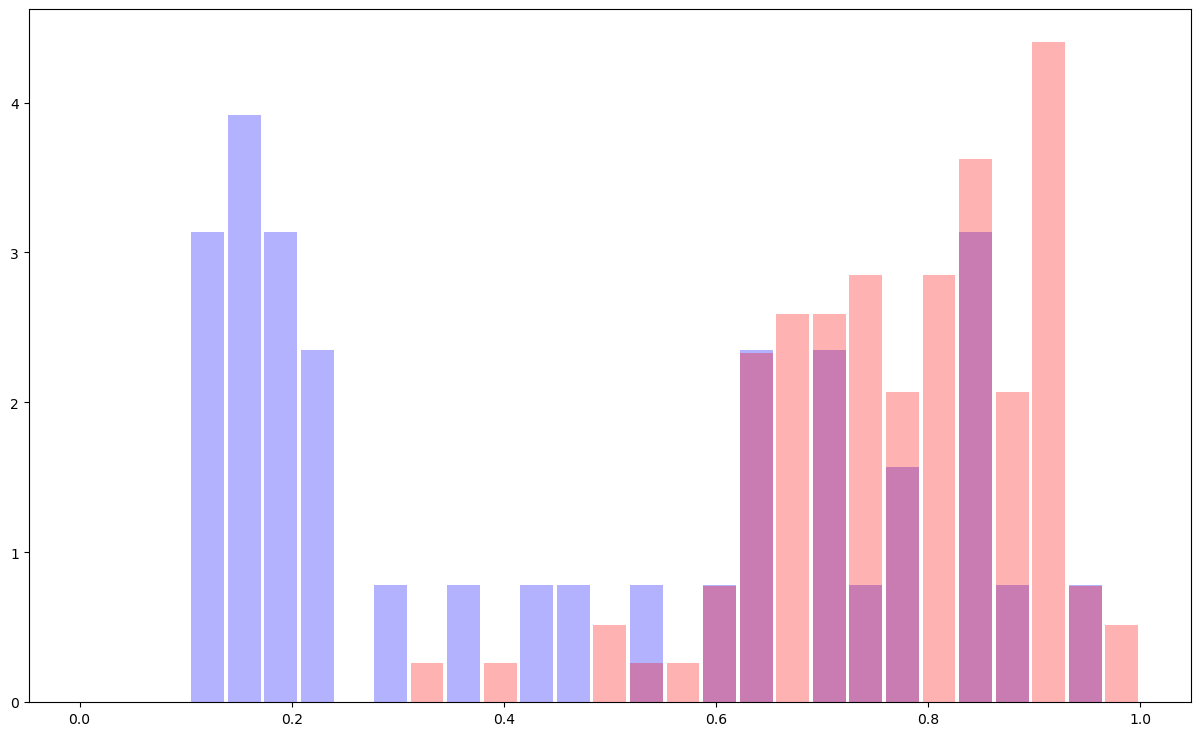

In [84]:
plt.figure(figsize = (15,9))
plt.hist(pred_v1[y_ts == 0], bins = np.linspace(0,1,30), density = True, color = 'b', alpha = .3, rwidth = 0.9)
plt.hist(pred_v1[y_ts == 1], bins = np.linspace(0,1,30), density = True, color = 'r', alpha = .3, rwidth = 0.9);

### Construção do Modelo 2 de Machine Learning para comparação com o modelo de benchmark

In [85]:
#Importando o C-Support Vector Classification
from sklearn.svm import SVC

params_2 = { 'C' : np.linspace(0.1, 10, 20),
           'gamma' : np.linspace(0.1, 5, 20),
           'class_weight': [None,'balanced']
    }
svc = SVC(kernel = 'rbf', probability = True, random_state = 61658)



In [86]:
model_2 = GridSearchCV(svc,params_2, cv=5, scoring='roc_auc', verbose=10, n_jobs=2)

In [87]:
model_2.fit(X_tr, y_tr)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=61658),
             n_jobs=2,
             param_grid={'C': array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ]),
                         'class_weight': [None, 'balanced'],
                         'gamma': array([0.1       , 0.35789474, 0.61578947, 0.87368421, 1.13157895,
       1.38947368, 1.64736842, 1.90526316, 2.16315789, 2.42105263,
       2.67894737, 2.93684211, 3.19473684, 3.45263158, 3.71052632,
       3.96842105, 4.22631579, 4.48421053, 4.74210526, 5.        ])},
             scoring='roc_auc', verbose=10)

In [88]:
#Melhores parâmetros
model_2.best_params_

{'C': 10.0, 'class_weight': None, 'gamma': 0.1}

In [89]:
#Métricas de Avaliação do Modelo 2

pred_v2 = model_2.predict_proba(X_ts)[:,1]

roc_auc_v2 = roc_auc_score(y_ts, pred_v2)
print(roc_auc_v2)

0.7273166023166023


In [90]:
#ROC nos dados e previsões em teste

fpr_2, tpr_2, thresholds = roc_curve(y_ts, pred_v2)

# AUC Score
auc_v2 = auc(fpr_2,tpr_2)
print(auc_v2)

0.7273166023166023


In [91]:
#Acuracia
y_pred_v2 = model_2.predict(X_ts)
acuracia_v2 = accuracy_score(y_ts, y_pred_v2)
print(acuracia_v2)

0.8523489932885906


In [92]:
#Recall do Modelo 2
recall_2 = recall_score(y_ts, y_pred_v2)

print(f"A sensibilidade do modelo é {round(recall_2,4)}")

A sensibilidade do modelo é 0.9732


In [93]:
#Dicionário com as métricas do modelo 2
dict_model_v2 = {
    'Nome' : 'Modelo_2',
    'Algoritmo' : 'SVC',
    'Roc_AUC_Score' : roc_auc_v2,
    'Auc Score' : auc_v2,
    'Acurácia' : acuracia_v2,
    'Recall' : recall_2
    
}

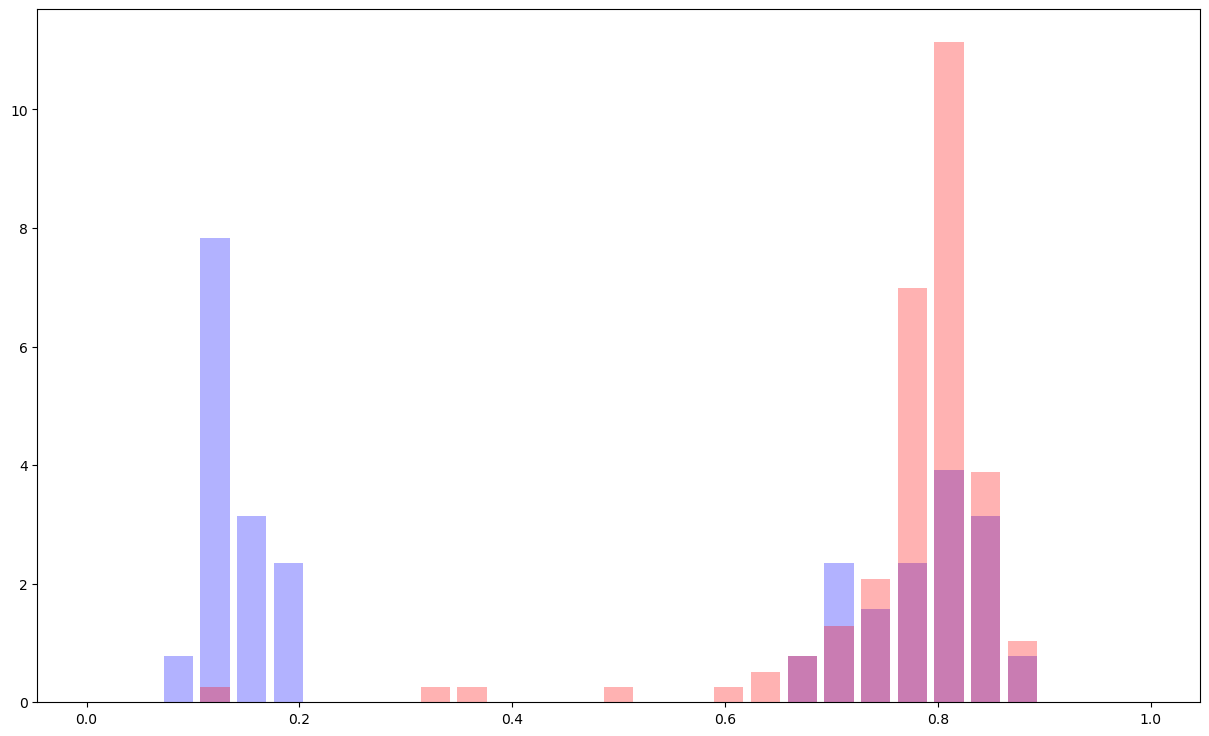

In [94]:
pred_2 = model_2.predict_proba(X_ts)[:,1]

plt.figure(figsize=(15,9))
plt.hist(pred_2[y_ts==0],color='b',density=True,alpha=.3,rwidth=.8, bins=np.linspace(0,1,30))
plt.hist(pred_2[y_ts==1],color='r',density=True,alpha=.3,rwidth=.8, bins=np.linspace(0,1,30));

### Construção do Modelo 3 de Machine Learning para comparação com o modelo de benchmark

In [95]:
from xgboost import XGBClassifier

In [96]:
params = { 'max_depth' : [2,3,5,7,9],
          'n_estimators' :[50,100,150,200],
          'learning_rate' : [0.05,0.1,0.15],
          'reg_alpha' : [0.,0.05,0.1],
          'reg_lambda' : [0,0.05,0.1]    
}

model_3 = GridSearchCV(
    XGBClassifier(random_state = 61658),
                       params,
                       cv = 5,
                       scoring = 'roc_auc',
                       verbose = 10,
                       n_jobs = 4)

In [97]:
#Treinando o modelo
model_3.fit(X_tr, y_tr)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [98]:
#Melhores Parâmetros
model_3.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 50,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1}

In [99]:
#Importancia de variáveis
imps3 = model_3.best_estimator_.feature_importances_
cols3 = X_tr.columns
order3 = np.argsort(imps)[::-1]

for col3, imp3 in zip(cols[order3], imps[order3]):
    print(f'{col3:30s}, {imp3:.2f}')

Credit_History                , 0.30
razao_renda_total             , 0.17
ApplicantIncome               , 0.14
LoanAmount                    , 0.12
CoapplicantIncome             , 0.09
Dependents                    , 0.04
Loan_Amount_Term              , 0.04
Education                     , 0.02
Semiurban                     , 0.02
Married                       , 0.02
Rural                         , 0.01
Self_Employed                 , 0.01
Urban                         , 0.01
Gender                        , 0.01


In [100]:
#Métricas de Avaliação do Modelo 3

pred_v3 = model_3.predict_proba(X_ts)[:,1]

roc_auc_v3 = roc_auc_score(y_ts, pred_v3)
print(roc_auc_v3)

0.7825772200772201


In [101]:
#ROC nos dados e previsões em teste

fpr_3, tpr_3, thresholds = roc_curve(y_ts, pred_v3)

# AUC Score
auc_v3 = auc(fpr_3,tpr_3)
print(auc_v3)

0.7825772200772201


In [102]:
#Acuracia
y_pred_v3 = model_3.predict(X_ts)
acuracia_v3 = accuracy_score(y_ts, y_pred_v3)
print(acuracia_v3)

0.87248322147651


In [103]:
#Recall do Modelo_3
recall_3 = recall_score(y_ts, y_pred_v3)

print(f"A sensibilidade do modelo é {round(recall_3,4)}")

A sensibilidade do modelo é 0.9911


In [104]:
#Dicionário com as métricas do modelo 3
dict_model_v3 = {
    'Nome' : 'Modelo_3',
    'Algoritmo' : 'XG Boost',
    'Roc_AUC_Score' : roc_auc_v3,
    'Auc Score' : auc_v3,
    'Acurácia' : acuracia_v3,
    'Recall' : recall_3
    
}

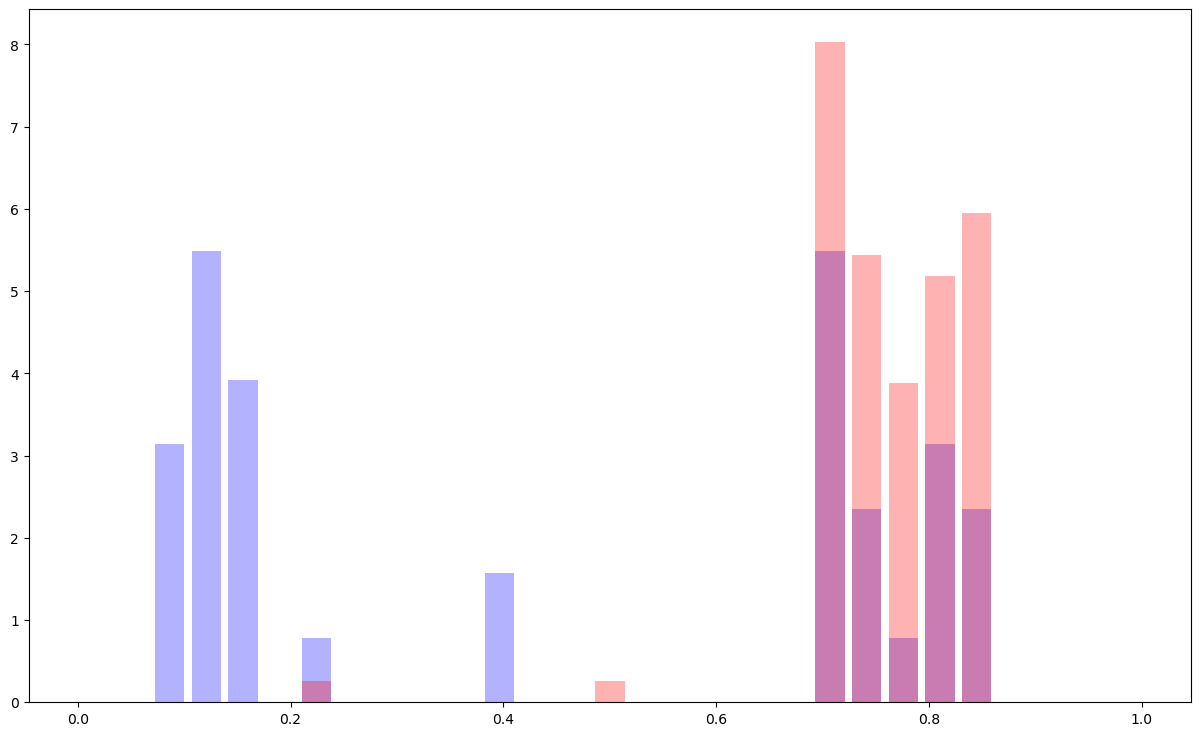

In [105]:
plt.figure(figsize=(15,9))
plt.hist(pred_v3[y_ts==0],color='b',density=True,alpha=.3,rwidth=.8, bins=np.linspace(0,1,30))
plt.hist(pred_v3[y_ts==1],color='r',density=True,alpha=.3,rwidth=.8, bins=np.linspace(0,1,30));

In [106]:
# Adicionando os dicionarios a um dataframe
modelos = modelos.append(dict_model_v1,ignore_index = True)
modelos = modelos.append(dict_model_v2,ignore_index = True)
modelos = modelos.append(dict_model_v3,ignore_index = True)

In [107]:
modelos

,Nome,Algoritmo,Roc_AUC_Score,Auc Score,Acurácia,Recall
0,Modelo_1,Random Forest,0.808880,0.808880,0.865772,0.973214
1,Modelo_2,SVC,0.727317,0.727317,0.852349,0.973214
2,Modelo_3,XG Boost,0.782577,0.782577,0.872483,0.991071


### O modelo escolhido para deploy é o Modelo_3 (XG Boost) devido a sua maior nota em Recall.